### Osnovno procesovanje neobradjenih podataka

In [72]:
# Importing relevant libraries and importing the database 
import pandas as pd

df_raw = pd.read_csv('real_estate_raw.csv')
# Making a copy of the df so we don't cause errors or modify the original df
df = df_raw.copy()

In [74]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9556 entries, 0 to 9555
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           9556 non-null   object
 1   Location        9556 non-null   object
 2   Price           9546 non-null   object
 3   Size            9556 non-null   object
 4   Apartment Type  9556 non-null   object
dtypes: object(5)
memory usage: 373.4+ KB


,Title,Location,Price,Size,Apartment Type
0,Dvoiposobni stan sa velikom tersom u kompleksu...,"Voždovac, Beograd, Srbija",210 000 €,70 m²,Dvosoban stan
1,"Novi Beograd, blok 44 Nehruova, Lux, 6.0 VIspr...","Novi Beograd Blok 44 (Piramida), Beograd, Srbija",450 000 €,200 m²,Petosoban+ stan
2,"Vojvode Stepe, sa parking mestom ID#10180","Voždovac, Beograd, Srbija",185 000 €,60 m²,Trosoban stan
3,"Galenika, 2.5 stan ID#10159","Galenika, Beograd, Srbija",150 000 €,62 m²,Trosoban stan
4,"Mirijevo, 2.5 stan ID#10151","Mirijevo I, Beograd, Srbija",125 000 €,57 m²,Trosoban stan


In [76]:
# Converting the price column to a numerical variable
# Removing NaN values
df = df.dropna(subset=["Price"]).copy()  # Using .copy() to bypass SettingWithCopyWarning

# Removing the euro symbol and spaces inside the numbers
df.loc[:, "Price"] = df["Price"].str.replace("€", "", regex=False).str.replace(" ", "").str.strip()

# Keeping only rows where the value is numeric
df = df[df["Price"].str.match(r"^\d+$", na=False)].copy()  # Koristimo .copy() da izbegnemo SettingWithCopyWarning

# Converting the column to an integer
df.loc[:, "Price in EUR"] = df["Price"].astype(int)

# Removing the original "Price" column
df = df.drop(columns=["Price"])

df.head()

,Title,Location,Size,Apartment Type,Price in EUR
0,Dvoiposobni stan sa velikom tersom u kompleksu...,"Voždovac, Beograd, Srbija",70 m²,Dvosoban stan,210000
1,"Novi Beograd, blok 44 Nehruova, Lux, 6.0 VIspr...","Novi Beograd Blok 44 (Piramida), Beograd, Srbija",200 m²,Petosoban+ stan,450000
2,"Vojvode Stepe, sa parking mestom ID#10180","Voždovac, Beograd, Srbija",60 m²,Trosoban stan,185000
3,"Galenika, 2.5 stan ID#10159","Galenika, Beograd, Srbija",62 m²,Trosoban stan,150000
4,"Mirijevo, 2.5 stan ID#10151","Mirijevo I, Beograd, Srbija",57 m²,Trosoban stan,125000


In [78]:
df['Price in EUR'].describe().round()

count       9460.0
mean      261906.0
std       219740.0
min            1.0
25%       130000.0
50%       205000.0
75%       309324.0
max      3995000.0
Name: Price in EUR, dtype: float64

In [80]:
# Converting the size column to a numerical variable

# Removing NaN values
df = df.dropna(subset=["Size"]).copy()  # Koristimo .copy() da izbegnemo SettingWithCopyWarning

# Removing m² and spaces inside the numbers
df.loc[:, "Size"] = df["Size"].str.replace("m²", "", regex=False).str.replace(" ", "").str.strip()

# Keeping only rows where the value is numeric
df = df[df["Size"].str.match(r"^\d+$", na=False)].copy()

# Converting the column to an integer
df.loc[:, "Size"] = df["Size"].astype(float).round().astype(int)
df["Size"] = pd.to_numeric(df["Size"], errors="coerce")

In [82]:
df['Size'].describe()

count      8394.000000
mean         99.823684
std        1409.518541
min           1.000000
25%          55.000000
50%          71.000000
75%          96.000000
max      128000.000000
Name: Size, dtype: float64

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8394 entries, 0 to 9555
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           8394 non-null   object
 1   Location        8394 non-null   object
 2   Size            8394 non-null   int64 
 3   Apartment Type  8394 non-null   object
 4   Price in EUR    8394 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 393.5+ KB


In [86]:
# Changing the Apartment type column to a numeric column with only the number of rooms
mapping = {
    '  Garsonjera': 1,
    '  Dvosoban stan': 2,
    '  Trosoban stan': 3,
    '  Četvorosoban stan': 4,
    '  Petosoban+ stan': 5
}

df['Rooms'] = df['Apartment Type'].map(mapping)

df = df.drop(['Apartment Type'], axis = 1)
df = df.dropna(subset=["Rooms"]).copy()

In [88]:
df['Rooms'].describe()

count    7840.000000
mean        3.069770
std         0.949203
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Rooms, dtype: float64

In [90]:
# Checking for duplicates, and removing them
duplikati = df.duplicated().sum()
print(f"Broj duplikata: {duplikati}")

df = df.drop_duplicates()

Broj duplikata: 60


In [92]:
# Modificating the Location column in order to get rid of the unnecessary part "Beograd, Srbija"
df["Location"] = df["Location"].str.split(", Beograd, Srbija").str[0]

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7780 entries, 0 to 9555
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         7780 non-null   object 
 1   Location      7780 non-null   object 
 2   Size          7780 non-null   int64  
 3   Price in EUR  7780 non-null   int64  
 4   Rooms         7780 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 364.7+ KB


IQR for Size: Q1 = 58.0, Q3 = 100.0, IQR = 42.0


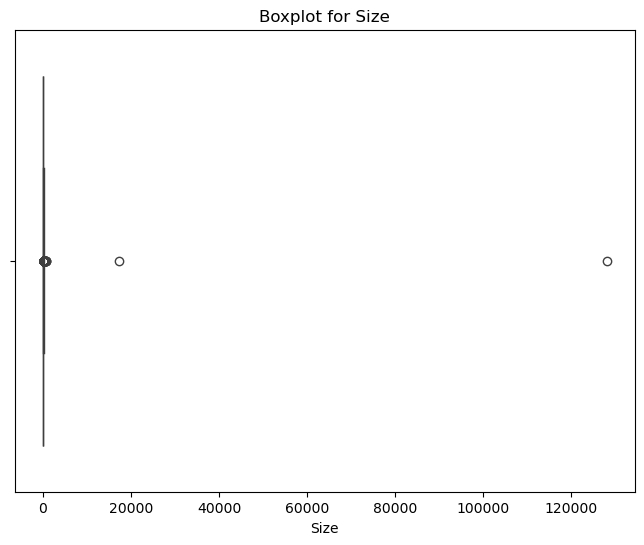

IQR for Price in EUR: Q1 = 141000.0, Q3 = 320000.0, IQR = 179000.0


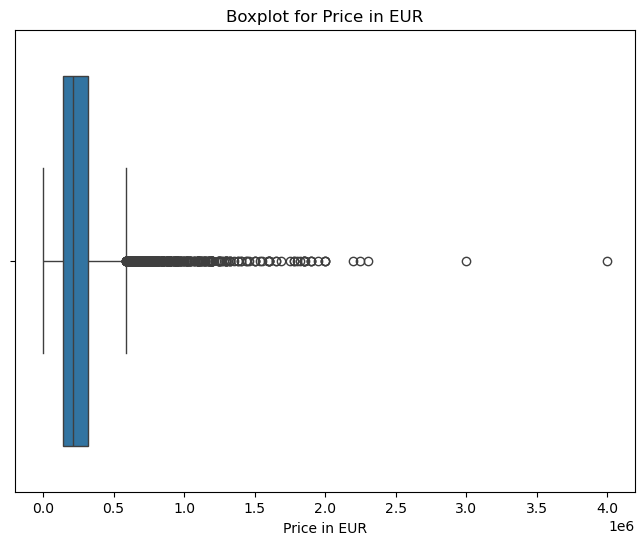

In [96]:
# Removal of extreme values ​​using IQR
import seaborn as sns
import matplotlib.pyplot as plt

# Function calculating IQR
def calculate_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return Q1, Q3, IQR

# Calculation of IQR for columns 'Size' and 'Price in EUR'
columns = ['Size', 'Price in EUR']
for col in columns:
    Q1, Q3, IQR = calculate_iqr(df, col)
    print(f"IQR for {col}: Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")
    
    # Visualization of a boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [97]:
# Defining the filtering function
def remove_outliers(df, column):
    Q1, Q3, IQR = calculate_iqr(df, column)
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    print(f"Granice za {column}: {lower_limit} (donja), {upper_limit} (gornja)")
    
    # Filtering data
    df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    return df

# Filtering extreme values ​​for both columns
df = remove_outliers(df, 'Size')
df = remove_outliers(df, 'Price in EUR')


Granice za Size: -5.0 (donja), 163.0 (gornja)
Granice za Price in EUR: -102000.0 (donja), 538000.0 (gornja)


In [99]:
# Removing unrealistic prices and sizes of apartments
df = df[(df["Price in EUR"] >= 10000) & (df["Size"] >= 5)]

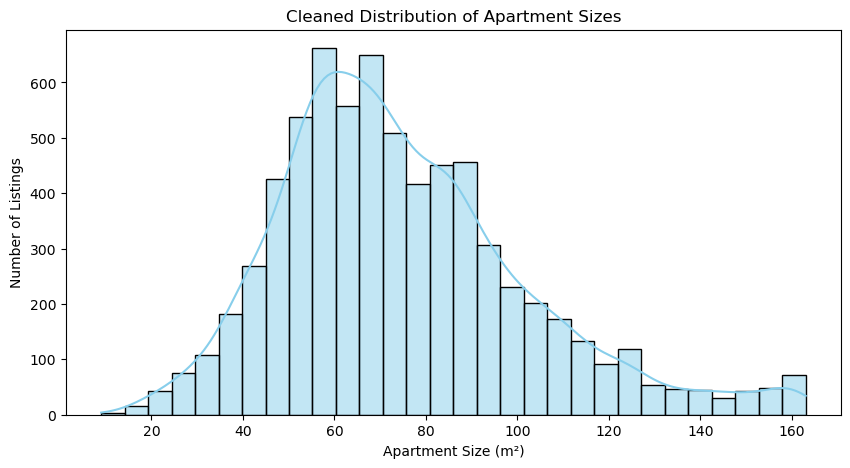

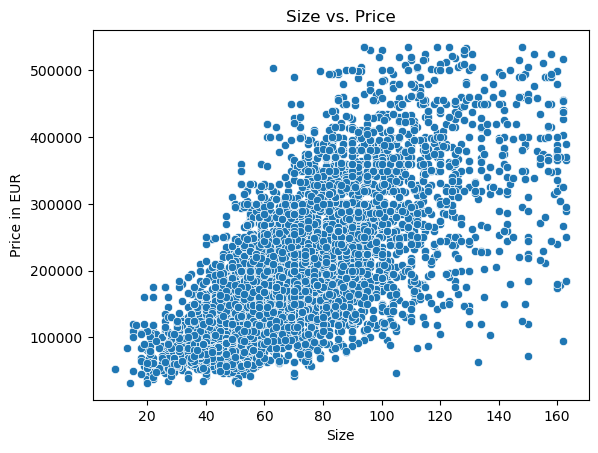

In [102]:
# Visualization of the cleaned data
plt.figure(figsize=(10, 5))
sns.histplot(df["Size"], bins=30, kde=True, color="skyblue")
plt.xlabel("Apartment Size (m²)")
plt.ylabel("Number of Listings")
plt.title("Cleaned Distribution of Apartment Sizes")
plt.show()

sns.scatterplot(x=df["Size"], y=df["Price in EUR"])
plt.title("Size vs. Price")
plt.show()

In [103]:
# Index resetting  
df = df.reset_index()
df = df.drop(['index'], axis = 1)

In [106]:
df

,Title,Location,Size,Price in EUR,Rooms
0,Dvoiposobni stan sa velikom tersom u kompleksu...,Voždovac,70,210000,2.0
1,"Vojvode Stepe, sa parking mestom ID#10180",Voždovac,60,185000,3.0
2,"Galenika, 2.5 stan ID#10159",Galenika,62,150000,3.0
3,"Mirijevo, 2.5 stan ID#10151",Mirijevo I,57,125000,3.0
4,Kompletno namešten stan ID#10102,Mirijevo I,54,138000,3.0
...,...,...,...,...,...
6943,"Golf, Izvorska, 80m2, duplex.",Čukarica,80,300000,4.0
6944,"#31425, Prodaja, Stan, VUKOV SPOMENIK, 500000 EUR",Bulevar Kr. Aleksandra,120,500000,4.0
6945,"#41679, Prodaja, Stan, LION, 200000 EUR",Lion,90,200000,3.0
6946,"Čukarica, Banovo brdo - Kraljice Katarine, 100...",Banovo brdo,100,225000,2.0


In [108]:
df.to_csv('real_estate_cleaned.csv', index=False)